<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20250219%5D%20DR%20(Before%20and%20After%20adversarial%20training)%20on%20both%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

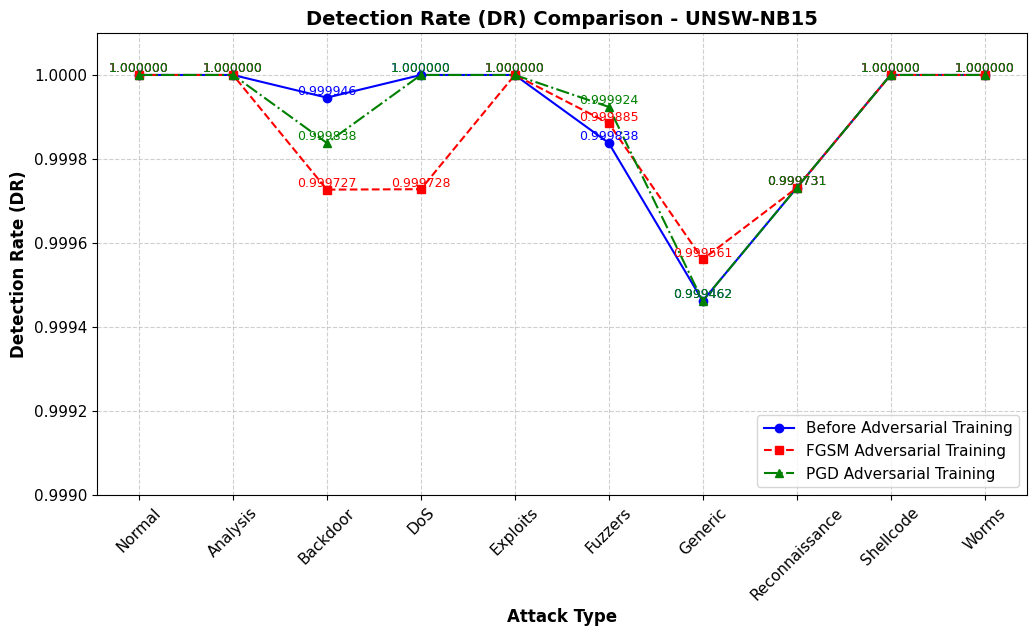

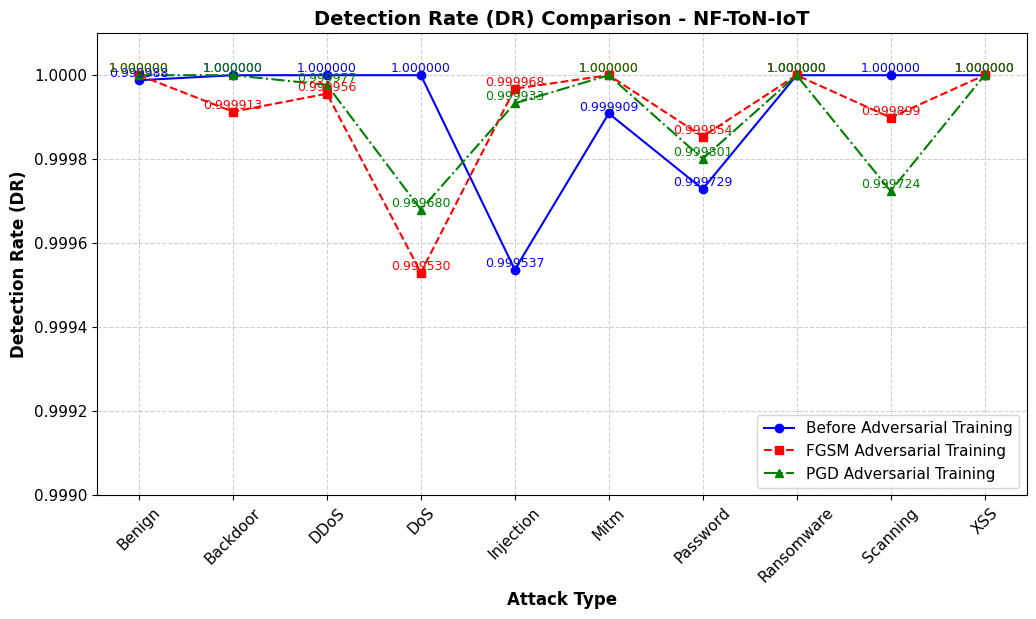

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Data categories for UNSW-NB15 dataset
categories_unsw = ["Normal", "Analysis", "Backdoor", "DoS", "Exploits", "Fuzzers", "Generic", "Reconnaissance", "Shellcode", "Worms"]
dr_before_unsw = [1.0000, 1.0000, 0.999946, 1.0000, 1.0000, 0.999838, 0.999462, 0.999731, 1.0000, 1.0000]
dr_fgsm_unsw = [1.0000, 1.0000, 0.999727, 0.999728, 1.0000, 0.999885, 0.999561, 0.999731, 1.0000, 1.0000]
dr_pgd_unsw = [1.0000, 1.0000, 0.999838, 1.0000, 1.0000, 0.999924, 0.999462, 0.999731, 1.0000, 1.0000]

# Data categories for NF-ToN-IoT dataset
categories_nftoiot = ["Benign", "Backdoor", "DDoS", "DoS", "Injection", "Mitm", "Password", "Ransomware", "Scanning", "XSS"]
dr_before_nftoiot = [0.999988, 1.0000, 1.0000, 1.0000, 0.999537, 0.999909, 0.999729, 1.0000, 1.0000, 1.0000]
dr_fgsm_nftoiot = [1.0000, 0.999913, 0.999956, 0.999530, 0.999968, 1.0000, 0.999854, 1.0000, 0.999899, 1.0000]
dr_pgd_nftoiot = [1.0000, 1.0000, 0.999977, 0.999680, 0.999933, 1.0000, 0.999801, 1.0000, 0.999724, 1.0000]

# Function to generate refined DR graphs
def plot_dr_graph(categories, dr_before, dr_fgsm, dr_pgd, dataset_name, filename):
    plt.figure(figsize=(12, 6))

    # Plot DR values
    plt.plot(categories, dr_before, marker='o', linestyle='-', color='blue', label="Before Adversarial Training")
    plt.plot(categories, dr_fgsm, marker='s', linestyle='--', color='red', label="FGSM Adversarial Training")
    plt.plot(categories, dr_pgd, marker='^', linestyle='-.', color='green', label="PGD Adversarial Training")

    # Labels and Formatting
    plt.xticks(rotation=45, fontsize=11)
    plt.yticks(fontsize=11)
    plt.xlabel("Attack Type", fontsize=12, fontweight='bold')
    plt.ylabel("Detection Rate (DR)", fontsize=12, fontweight='bold')
    plt.title(f"Detection Rate (DR) Comparison - {dataset_name}", fontsize=14, fontweight='bold')
    plt.ylim(0.9990, 1.0001)  # Emphasize small variations
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc="lower right", fontsize=11)

    # Display numeric values on the graph
    for i, txt in enumerate(dr_before):
        plt.text(i, dr_before[i], f"{txt:.6f}", ha='center', va='bottom', fontsize=9, color="blue")
    for i, txt in enumerate(dr_fgsm):
        plt.text(i, dr_fgsm[i], f"{txt:.6f}", ha='center', va='bottom', fontsize=9, color="red")
    for i, txt in enumerate(dr_pgd):
        plt.text(i, dr_pgd[i], f"{txt:.6f}", ha='center', va='bottom', fontsize=9, color="green")

    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(filename), exist_ok=True)

    # Save the figure
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Generate and save refined graphs
plot_dr_graph(categories_unsw, dr_before_unsw, dr_fgsm_unsw, dr_pgd_unsw, "UNSW-NB15", "/mnt/data/DR_UNSW_NB15.png")
plot_dr_graph(categories_nftoiot, dr_before_nftoiot, dr_fgsm_nftoiot, dr_pgd_nftoiot, "NF-ToN-IoT", "/mnt/data/DR_NF_ToN_IoT.png")